In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotx
from scipy.optimize import curve_fit
import matplotlib.patheffects as pe


plt.style.use(matplotx.styles.pitaya_smoothie["light"])


In [ ]:
particle_size=pd.read_csv("results/dimensions_data.csv")
pixel_size=0.83
particle_size

,Frame,Area,Yc,Xc,Minor Axis,Major Axis,Angle
0,0,3311.5423,67.867828,71.241013,85.014305,94.504814,79.536011
1,1,3768.9719,82.318542,69.436081,75.673203,106.180031,173.469193
2,2,2969.8479,76.084084,72.506721,62.954990,93.200294,149.031784
3,3,4133.4000,73.384750,74.996834,86.122597,98.381744,26.255615
4,4,3226.8076,78.249199,79.506248,79.218094,100.882294,147.587051
...,...,...,...,...,...,...,...
991,991,3738.6603,65.163795,72.256042,65.743767,127.707542,14.576345
992,992,3471.3671,68.780518,71.340775,71.392509,117.837158,162.690033
993,993,4335.9366,77.914658,75.505661,86.177864,120.092735,148.367126
994,994,3133.1172,75.229927,76.284531,71.640930,90.911659,175.885056


In [11]:
def gaussian(x, amp, mean, std):
        return amp * np.exp(-0.5 * ((x - mean) / std) ** 2)

def fit_gaussian_to_data(data,bins=50):
    """
    Fit a Gaussian to the data and return the fitted parameters.
    """
    # Calculate histogram
    hist, bin_edges = np.histogram(data, bins=bins)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    # Fit Gaussian
    mean = np.mean(data)
    std = np.std(data)
    amplitude = np.max(hist)

    

    popt, _ = curve_fit(gaussian, bin_centers, hist, p0=[amplitude, mean, std])

    return popt


In [44]:
def plot_gausian(data, bins=50,ax=None):
    """
    Plot the histogram and fitted Gaussian.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    # Calculate histogram
    hist, bin_edges = np.histogram(data, bins=bins)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    # Fit Gaussian
    popt = fit_gaussian_to_data(data)

    # Plot histogram
    ax.hist(data, bins=bins, density=False, label='Data')

    # Plot fitted Gaussian
    x = np.linspace(bin_edges[0]-10, bin_edges[-1]+10, 100)
    ax.plot(x, gaussian(x, *popt), 'r-', label='Fitted Gaussian')

    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.grid(False)
    ax.text(popt[1]+10,popt[0],f"{popt[1]:.3f} Å",size=15,fontfamily="Century Gothic",path_effects=[pe.withStroke(linewidth=2, foreground="white")],verticalalignment="baseline",clip_on=True)
    ax.get_yaxis().set_visible(False)



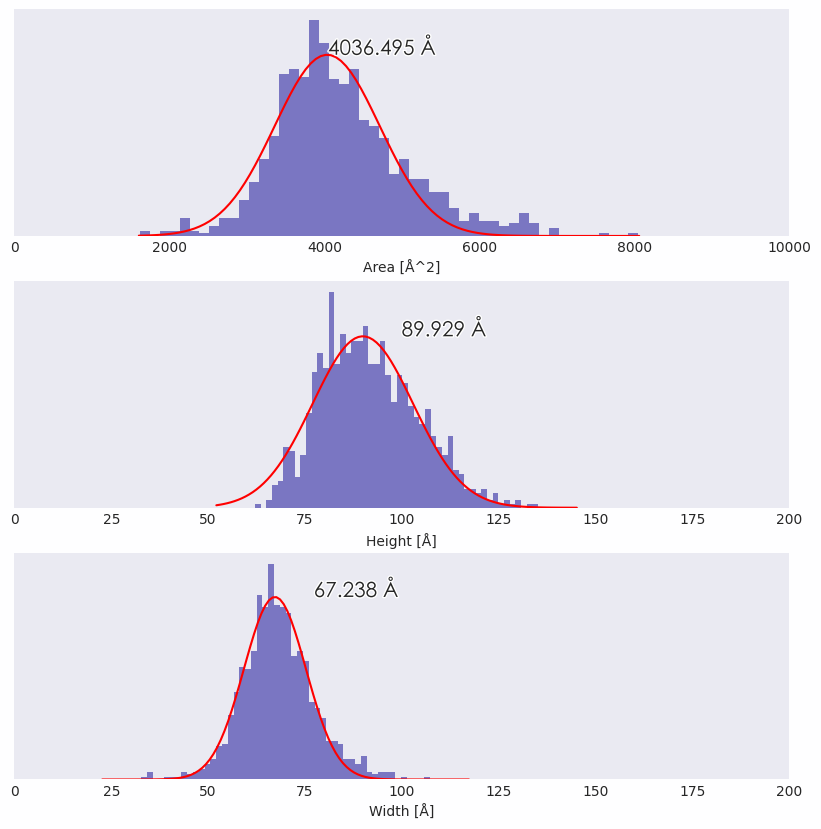

In [46]:
fig, ax = plt.subplots(3,1,figsize=(10, 10))
# Plot histograms and fitted Gaussian
plot_gausian(particle_size.Area, bins=50,ax=ax[0])
plot_gausian(particle_size["Major Axis"]*pixel_size, bins=50,ax=ax[1])
plot_gausian(particle_size["Minor Axis"]*pixel_size, bins=50,ax=ax[2])
ax[0].set(xlim=(000, 10000), ylabel="Counts", xlabel="Area [Å^2]")
ax[1].set(xlim=(0, 200), ylabel="Counts", xlabel="Height [Å]")
ax[2].set(xlim=(0, 200), ylabel="Counts", xlabel="Width [Å]")

fig.savefig("results/particle_size.svg", dpi=300, bbox_inches='tight')